In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DGGAN2/code

/content/drive/MyDrive/DGGAN2/code


In [3]:
!python dggan.py

Streaming output truncated to the last 5000 lines.
auc_0=0.8308 auc_50=0.8201 auc_100=0.8110
dis_loss=3.2091 pos_loss=0.2310 neg_loss_0=0.8044 neg_loss_1=0.7355 neg_loss_2=0.6213 neg_loss_3=0.8168
auc_0=0.8305 auc_50=0.8164 auc_100=0.8043
dis_loss=3.1853 pos_loss=0.2299 neg_loss_0=0.8002 neg_loss_1=0.7303 neg_loss_2=0.6157 neg_loss_3=0.8093
auc_0=0.8304 auc_50=0.8127 auc_100=0.7973
dis_loss=3.1617 pos_loss=0.2287 neg_loss_0=0.7960 neg_loss_1=0.7251 neg_loss_2=0.6101 neg_loss_3=0.8019
auc_0=0.8305 auc_50=0.8088 auc_100=0.7900
dis_loss=3.1383 pos_loss=0.2273 neg_loss_0=0.7918 neg_loss_1=0.7199 neg_loss_2=0.6046 neg_loss_3=0.7947
auc_0=0.8306 auc_50=0.8049 auc_100=0.7825
dis_loss=3.1151 pos_loss=0.2258 neg_loss_0=0.7876 neg_loss_1=0.7148 neg_loss_2=0.5992 neg_loss_3=0.7876
auc_0=0.8308 auc_50=0.8009 auc_100=0.7748
dis_loss=3.0919 pos_loss=0.2243 neg_loss_0=0.7835 neg_loss_1=0.7098 neg_loss_2=0.5938 neg_loss_3=0.7806
auc_0=0.8310 auc_50=0.7969 auc_100=0.7670
dis_loss=3.0690 pos_loss=0.2226

In [4]:
cd /content/drive/MyDrive/DGGAN2

/content/drive/MyDrive/DGGAN2


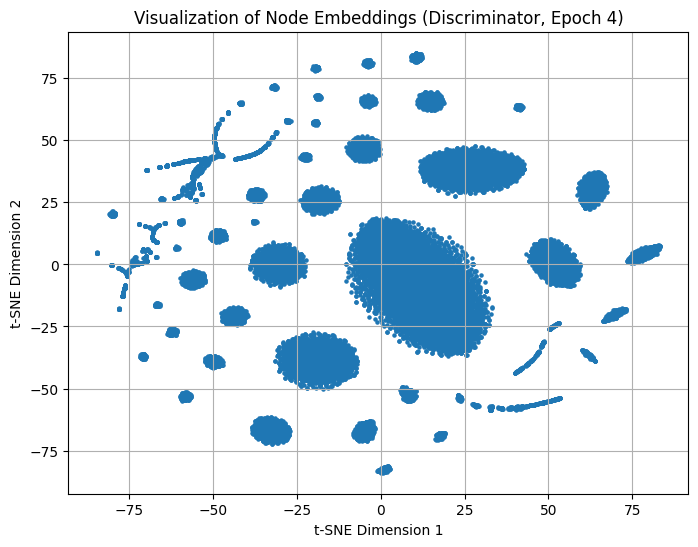

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def read_embeddings(filename):
    with open(filename) as f:
        lines = f.readlines()[1:]
        data = [list(map(float, line.strip().split()[1:])) for line in lines]
    return np.array(data)

embedding_file = '/content/drive/MyDrive/DGGAN2/results/link_prediction/cora/96-dis_s.emb'
X = read_embeddings(embedding_file)
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5)
plt.title("Visualization of Node Embeddings (Discriminator, Epoch 4)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

Using n_node = 23166
TensorFlow version: 2.19.0
Starting link reconstruction evaluation. v4.0
Reading test data from ../data/cora/test_0.5_0
Total test links: 91500
Positive test links: 45750
Known positive links: 32024
Positive links to reconstruct: 13726
reading graph...
[0.26] reading graph finished. #node = 23166
building DGGAN model...
initialize...
Loading model from checkpoint: /content/drive/MyDrive/DGGAN2/results/link_prediction/cora/ckpt-96
Total unique nodes in test data: 23089
Getting node embeddings...
Evaluating reconstruction for each source node...


  0%|          | 0/8691 [00:00<?, ?it/s]


Link Reconstruction Evaluation Results:
Hits@100: 0.1246 (1083/8691)
MRR: 0.0134
Precision@100: 0.0013


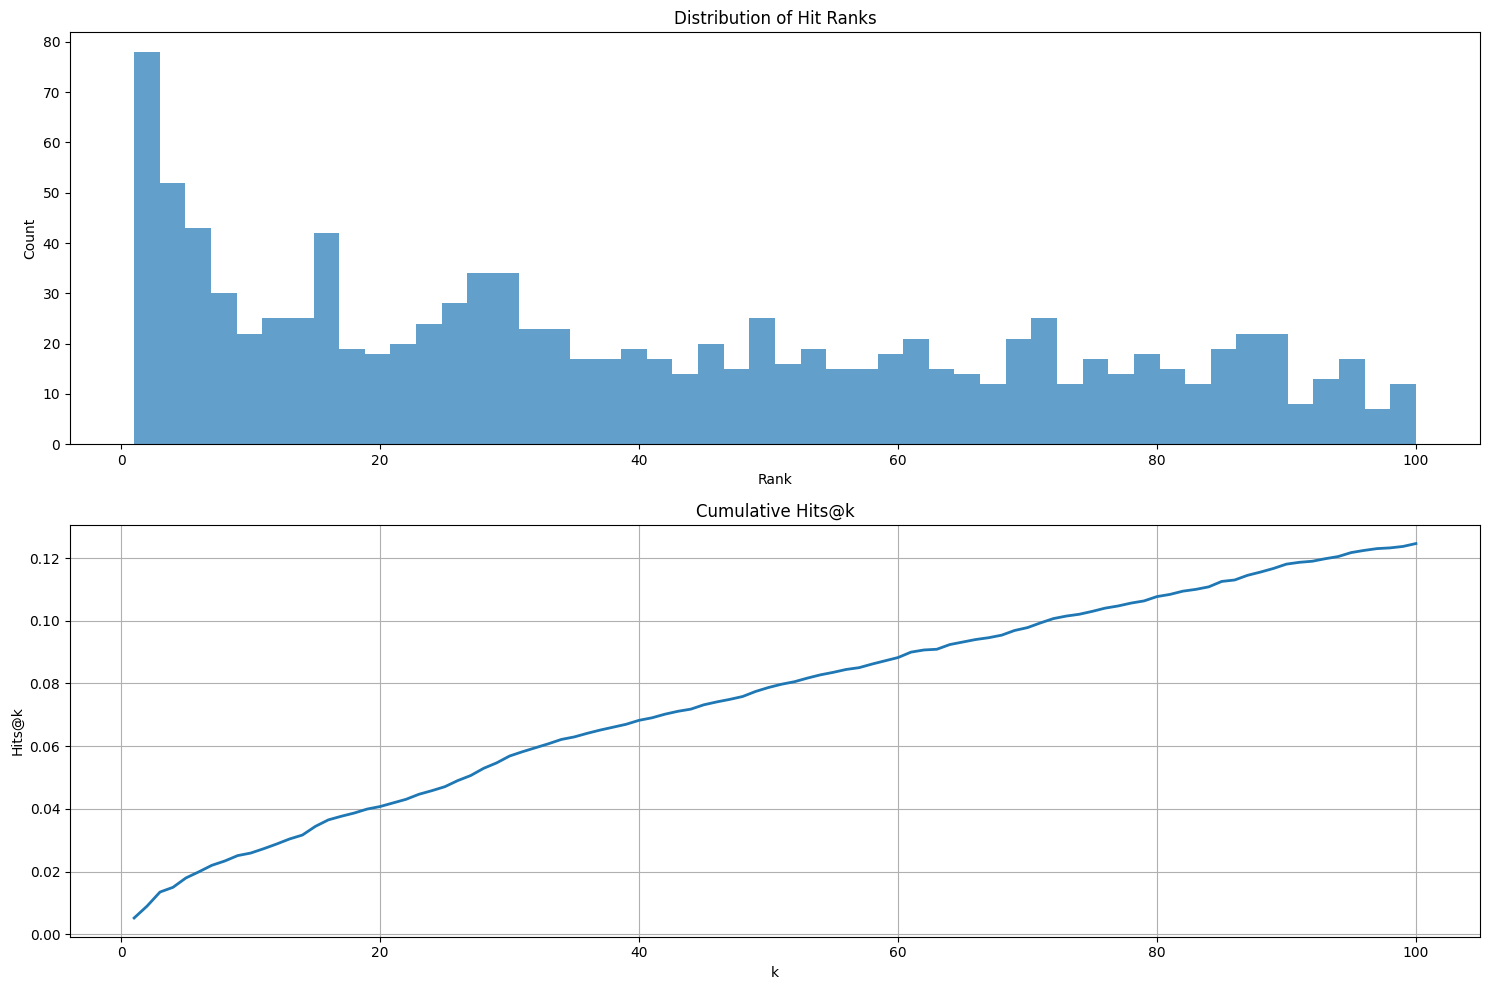

In [6]:
import os
os.chdir('/content/drive/MyDrive/DGGAN2/code')
from colab_positive_link_eval import evaluate_positive_links
# Now you can run evaluation
results = evaluate_positive_links(test_ratio=0.3,
                                 checkpoint_path='/content/drive/MyDrive/DGGAN2/results/link_prediction/cora/ckpt-96')

Starting link reconstruction evaluation with 5 iterations. v4.1
Reading test data from ../data/cora/test_0.5_0
Total test links: 91500
Positive test links: 45750
reading graph...
[0.07] reading graph finished. #node = 23166
building DGGAN model...
initialize...
Loading model from checkpoint: /content/drive/MyDrive/DGGAN2/results/link_prediction/cora/ckpt-96
Total unique nodes in test data: 23089
Getting node embeddings...

--- Iteration 1/5 ---
Known positive links: 32024
Positive links to reconstruct: 13726
Evaluating reconstruction for each source node...


  0%|          | 0/8691 [00:00<?, ?it/s]


--- Iteration 1 Detailed Results ---
1. Removed links (edges to reconstruct): 13726
2. Remaining known links (true edges left): 32024
3. Hits@1 (first-rank accuracy): 0.0052 (45/8691)
   Hits@100: 0.1246 (1083/8691)
   MRR: 0.0134
   Precision@100: 0.0013

--- Iteration 2/5 ---
Known positive links: 32024
Positive links to reconstruct: 13726
Evaluating reconstruction for each source node...


  0%|          | 0/8703 [00:00<?, ?it/s]


--- Iteration 2 Detailed Results ---
1. Removed links (edges to reconstruct): 13726
2. Remaining known links (true edges left): 32024
3. Hits@1 (first-rank accuracy): 0.0046 (40/8703)
   Hits@100: 0.1209 (1052/8703)
   MRR: 0.0130
   Precision@100: 0.0013

--- Iteration 3/5 ---
Known positive links: 32024
Positive links to reconstruct: 13726
Evaluating reconstruction for each source node...


  0%|          | 0/8636 [00:00<?, ?it/s]


--- Iteration 3 Detailed Results ---
1. Removed links (edges to reconstruct): 13726
2. Remaining known links (true edges left): 32024
3. Hits@1 (first-rank accuracy): 0.0038 (33/8636)
   Hits@100: 0.1303 (1125/8636)
   MRR: 0.0127
   Precision@100: 0.0014

--- Iteration 4/5 ---
Known positive links: 32024
Positive links to reconstruct: 13726
Evaluating reconstruction for each source node...


  0%|          | 0/8683 [00:00<?, ?it/s]


--- Iteration 4 Detailed Results ---
1. Removed links (edges to reconstruct): 13726
2. Remaining known links (true edges left): 32024
3. Hits@1 (first-rank accuracy): 0.0043 (37/8683)
   Hits@100: 0.1270 (1103/8683)
   MRR: 0.0127
   Precision@100: 0.0014

--- Iteration 5/5 ---
Known positive links: 32024
Positive links to reconstruct: 13726
Evaluating reconstruction for each source node...


  0%|          | 0/8710 [00:00<?, ?it/s]


--- Iteration 5 Detailed Results ---
1. Removed links (edges to reconstruct): 13726
2. Remaining known links (true edges left): 32024
3. Hits@1 (first-rank accuracy): 0.0053 (46/8710)
   Hits@100: 0.1250 (1089/8710)
   MRR: 0.0133
   Precision@100: 0.0013

=== OVERALL RESULTS ACROSS 5 ITERATIONS ===
Average removed links per iteration: 13726.0
Average remaining known links per iteration: 32024.0
Hits@1 (First-rank accuracy): 0.0046 ± 0.0006
Hits@100: 0.1256 ± 0.0031
MRR: 0.0130 ± 0.0003
Precision@100: 0.0013 ± 0.0000


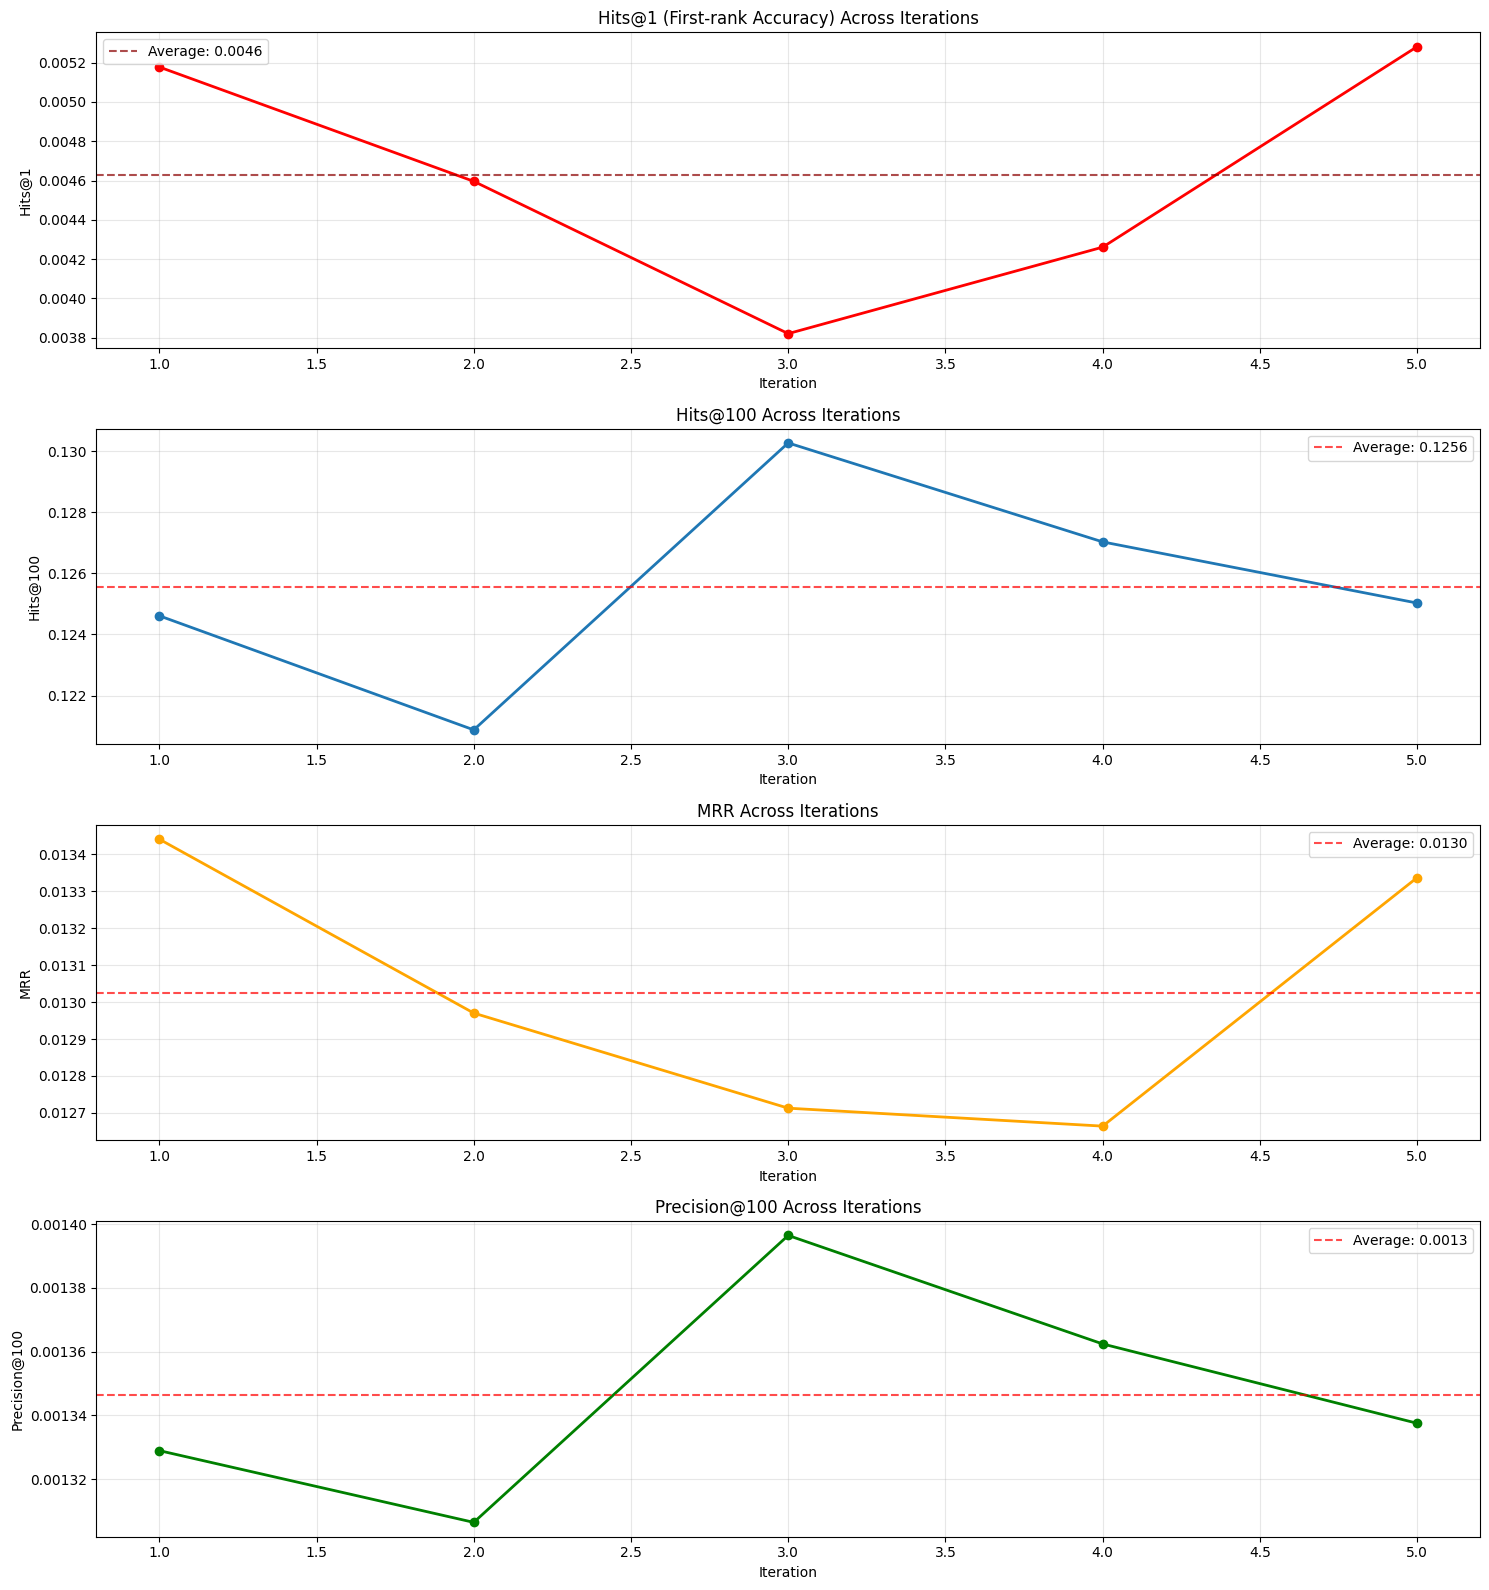

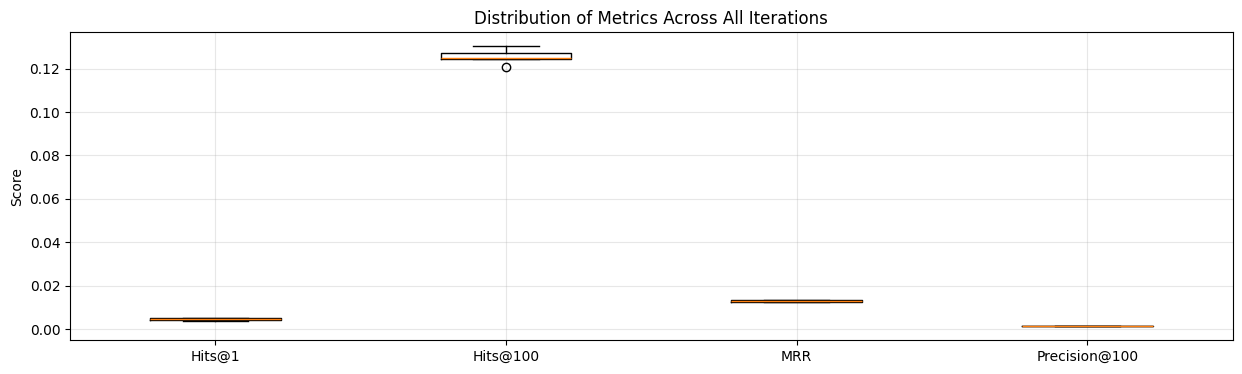


=== MACHINE INTERPRETABLE DATA ===
ITERATION_METRICS:
iterations: [1, 2, 3, 4, 5]
hits_at_1: [0.0051777701070072485, 0.004596116281741928, 0.0038212135247799907, 0.0042612000460670275, 0.005281285878300804]
hits_at_k: [0.12461166724197445, 0.12087785820981271, 0.13026864289022697, 0.12702982840032248, 0.12502870264064295]
mrr: [0.013441073085275054, 0.012970285196763888, 0.012712861857004279, 0.012664267672155918, 0.01333695640477764]
precision_at_k: [0.0013289609941318382, 0.0013064460530851218, 0.0013964798517832095, 0.0013624323390532998, 0.0013375430539609417]
total_predictions: [8691, 8703, 8636, 8683, 8710]
removed_links: [13726, 13726, 13726, 13726, 13726]
remaining_links: [32024, 32024, 32024, 32024, 32024]

AGGREGATE_STATISTICS:
avg_removed_links: 13726.0
avg_remaining_links: 32024.0
avg_hits_at_1: 0.0046275171675794
std_hits_at_1: 0.0005505436654804775
avg_hits_at_k: 0.1255633398765959
std_hits_at_k: 0.0030801208180077436
avg_mrr: 0.013025088843195356
std_mrr: 0.000316539196

In [7]:
import os
os.chdir('/content/drive/MyDrive/DGGAN2/code')
from colab_positive_link_repeated_eval import repeated_evaluation_of_positive_links
# Now you can run evaluation
results = repeated_evaluation_of_positive_links(test_ratio=0.3,
                                 checkpoint_path='/content/drive/MyDrive/DGGAN2/results/link_prediction/cora/ckpt-96',
                                 visualize=True,
                                 top_k=100,
                                 k_iterations=5)